# 6.2 Exploring relationships

### This script contains the following:

#### 1. Importing Visualization Libraries and Data
#### 2. Data Cleaning
#### 3. Exploring Relationships
     Correlations
     Scatterplots
     Pair Plots
     Categorical Plots
#### 4. Comments and Hypotheses

## 1. Importing visualization libraries and data

In [1]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib

In [2]:
# checking matplotlib version
matplotlib.__version__

'3.7.1'

In [3]:
# This option ensures the charts are displayed in the notebook without the need to "call" them specifically.
%matplotlib inline

In [4]:
# define path
path = r'/Users/yusufsalk/Documents/Chocolate Bar Analysis'

In [5]:
# import data
df = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'chocolate_bar.pkl'))

In [6]:
# check the result
df.head()

,company_name,specific_bean_origin,ref,review_date,cocoa_percentage,company_location,rating,broad_bean_origin
0,A. Morin,Agua Grande,1876,2016,0.63,France,3.75,Sao Tome
1,A. Morin,Kpime,1676,2015,0.70,France,2.75,Togo
2,A. Morin,Atsane,1676,2015,0.70,France,3.00,Togo
3,A. Morin,Akata,1680,2015,0.70,France,3.50,Togo
4,A. Morin,Quilla,1704,2015,0.70,France,3.50,Peru


In [7]:
#current dir
cwd = os.getcwd()
cwd

'/Users/yusufsalk/Documents/Chocolate Bar Analysis/03 Scripts'

## 2. Exploring relationships

### Correlations

In [8]:
# create a correlation matrix
df.corr(numeric_only = True)

,ref,review_date,cocoa_percentage,rating
ref,1.000000,0.985076,0.037791,0.101030
review_date,0.985076,1.000000,0.038177,0.099846
cocoa_percentage,0.037791,0.038177,1.000000,-0.164820
rating,0.101030,0.099846,-0.164820,1.000000


In [9]:
cat_columns = df.select_dtypes(['category']).columns
cat_columns

Index(['company_name', 'specific_bean_origin', 'company_location',
       'broad_bean_origin'],
      dtype='object')

In [10]:
df[cat_columns] = df[cat_columns].apply(lambda x: x.cat.codes)
df.sample(5)

,company_name,specific_bean_origin,ref,review_date,cocoa_percentage,company_location,rating,broad_bean_origin
1434,336,372,227,2008,0.72,56,3.00,87
1719,395,871,1205,2014,0.75,56,3.00,55
442,102,662,292,2008,0.72,1,3.25,3
715,159,472,623,2011,0.70,12,3.25,50
1534,353,690,833,2012,0.70,7,3.75,36


In [11]:
# create a subset excluding unnecessary columns
sub = df[['cocoa_percentage', 'company_location', 'rating', 'broad_bean_origin']]

In [12]:
sub.head()

,cocoa_percentage,company_location,rating,broad_bean_origin
0,0.63,18,3.75,67
1,0.70,18,2.75,77
2,0.70,18,3.00,77
3,0.70,18,3.50,77
4,0.70,18,3.50,55


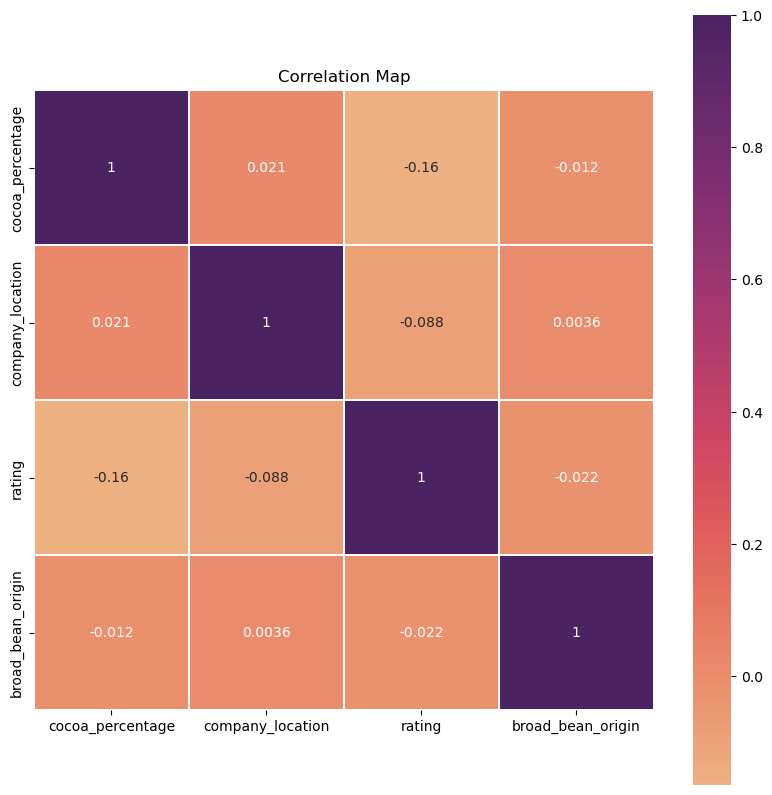

In [13]:
# Create a subplot with matplotlib
f,ax = plt.subplots(figsize=(10,10))

# Create the correlation heatmap in seaborn
corr = sns.heatmap(sub.corr(), linewidths=0.1, vmax=1.0, square=True, cmap='flare', linecolor='white', annot = True, ax = ax).set_title("Correlation Map")
# The `annot` argument allows the plot to place the correlation coefficients onto the heatmap.

There is only a correlation between "cocoa_percentage" and “rating” that is worth to consider. A -0.16 coefficient indicates a weak negative correlation. This could be interpreted as “the higher the cocoa percentage, the lower the rating,” and vice versa—”the lower the cocoa percentage, the higher the rating.”

### Scatterplots

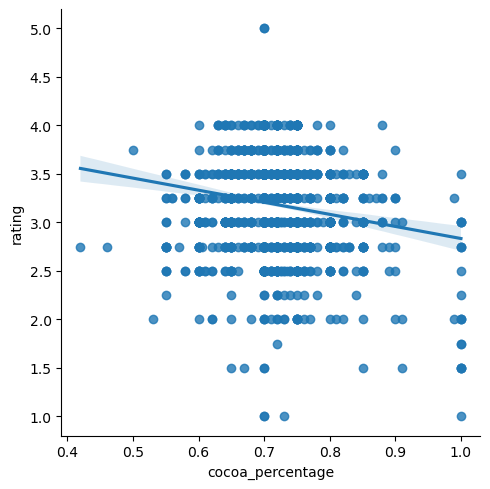

In [14]:
# create a scatterplot for the "cocoa_percentage" and "rating" columns
s = sns.lmplot(x = 'cocoa_percentage', y = 'rating', data = df)

In the scatterplot, while there is a weak negative relationship between these two columns, the trend line isn’t very steep, and there are still quite a few points that don’t correspond with the trend. Outliers can be spotted, such as the point at the “cocoa_percentage” = 0.7 and “rating” = 5 coordinates.

In [15]:
# save the chart
s.savefig("scatterplot.png") 

### Pair Plots

In [ ]:
# Create a pair plot 
g = sns.pairplot(df)

Looking at the pair plot, many of the scatterplots are plotting categorical variables, so they appear more structured than their numerical counterparts. However, perhaps, there is a slightly close relationship between "rating" and "review_date"

In [17]:
# save the chart
g.savefig("pairplot.png") 

### Categorical Plots

<Axes: xlabel='rating', ylabel='Count'>

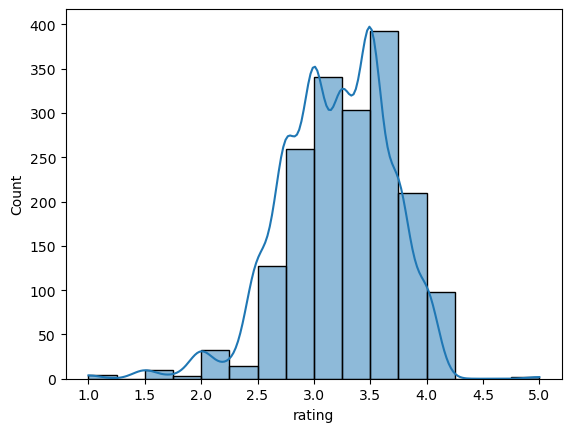

In [18]:
# create a categorical plot
sns.histplot(df['rating'], bins = 16, kde = True)

The graph shows the distribution of the “rating” variable. Based on this, we can create the following categories:
- “Low rating” < 2.75
- “Medium rating” >= 2.75 and <3.75
- “High rating” >= 3.75

In [19]:
df.loc[df['rating'] < 2.75, 'rating_category'] = 'Low rating'
df.loc[(df['rating'] >= 2.75) & (df['rating'] < 3.75), 'rating_category'] = 'Middle rating'
df.loc[df['rating'] >= 3.75, 'rating_category'] = 'High rating'

In [20]:
df['rating_category'].value_counts(dropna=False)

Middle rating    1295
High rating       310
Low rating        190
Name: rating_category, dtype: int64

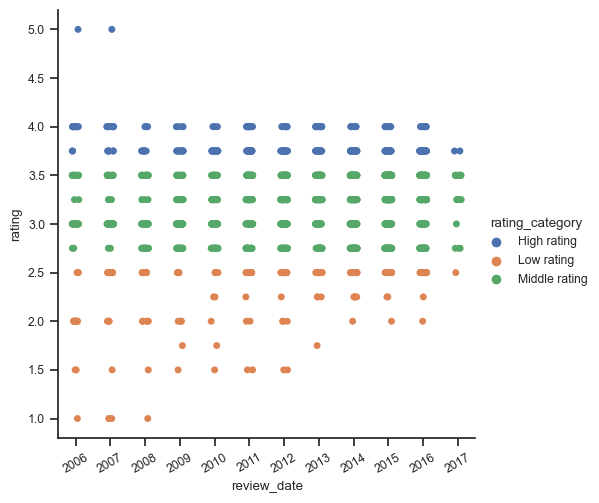

In [21]:
# Create a categorical plot
sns.set(style="ticks", font_scale=0.8)
c = sns.catplot(x="review_date", y="rating", hue="rating_category", data=df,)
c.set_xticklabels(rotation=30) 

Looking at the categorical plot above, it can be interpreted that reviewers were prone to give ratings in wide range in the early years. Then, it can be said that the rating range that were given by reviewers has narrowed gradually. For example, there are different ranges among 2006-2008, 2009-2012, 2013, 2014-2016, and 2017. It can be inferred that the voting range towards the last years has squeezed towards the middle rating area. This may come from the change of reviewer's experience over time.

In [22]:
# save the chart
c.savefig("categorical.png") 

## 4. Comments and Hypotheses

Comments: 

Overall, it can be drawn that people don't like very dark chocolate. This may be so due to increased its bitterness. nevertheless, it is not a solid argument. Likewise, reviewers tend to give more moderate ratings as time goes on. However, since these are not strong relationships, further analysis may be required as to how they affect each other. So, the new question might be "How the review date affect ratings?"

Hypotheses:

1. If the percentage of cocoa increases, the rating decreases.
2. If the review date is new daated, the rating is more likely to be in middle range.